#### *Ripser* is python binding package to compute the persistent homology.
#### *Persim* most of time used for the viusalization and Machine leraning task.
#### *TadaSets* provide the different basic datasets particularlly for TDA.


In [1]:
!pip install ripser
!pip install persim
!pip install tadasets

In [1]:
import tadasets
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from ripser import ripser
from persim import plot_diagrams

import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

In [2]:
# this will create a datasets of eyeglasses
eyeglasses = tadasets.eyeglasses(n=70,r1=10.0,r2=5.0)
np.shape(eyeglasses)

(70, 2)

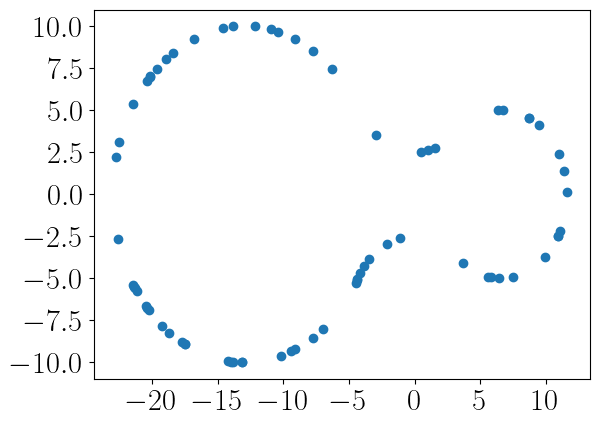

In [5]:


# Assuming eyeglasses is your data array
plt.scatter(eyeglasses[:, 0], eyeglasses[:, 1])



# Increase the font size of the axis values (tick labels)
plt.xticks(fontsize=22)  # X-axis tick labels font size
plt.yticks(fontsize=22)  # Y-axis tick labels font size

# Show the plot
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11008\1387188487.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


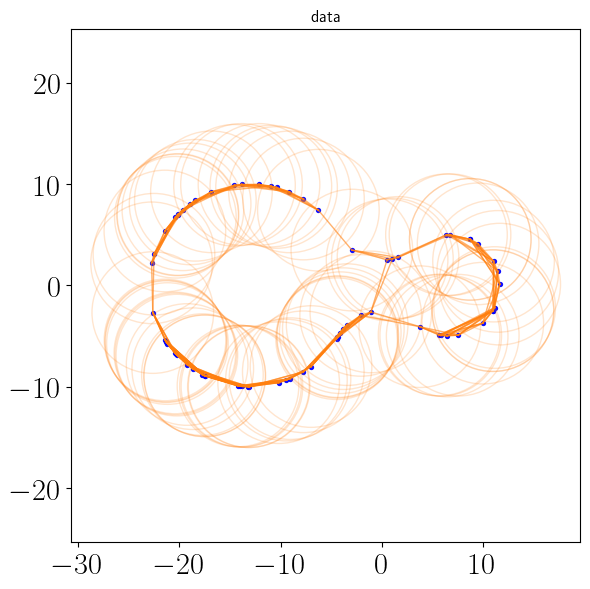

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.cm as cm

# Assuming eyeglasses is your data array
data = eyeglasses
data_noisy = eyeglasses

def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)

    # Set points to blue
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c='blue'  # Change color to blue
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >= 1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    # Increase font size for axis tick values
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

# Call the function
plot_rips_complex(data_noisy, R=6,  maxdim=1)


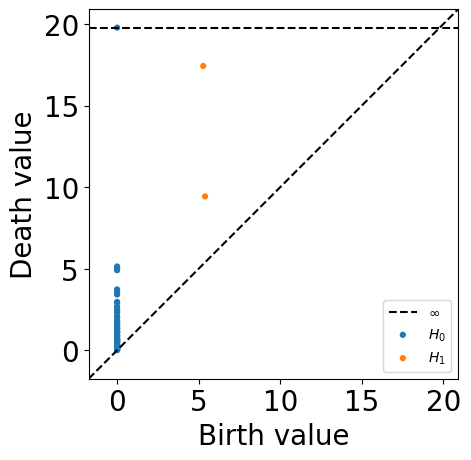

In [12]:
dgms = ripser(eyeglasses)['dgms']
plot_diagrams(dgms)
#plt.title('Persistent Diagram')
# Increase the font size of the axis values (tick labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Birth value', fontsize=20)  # Change to your desired label
plt.ylabel('Death value', fontsize=20)  # Change to your desired label

plt.show()

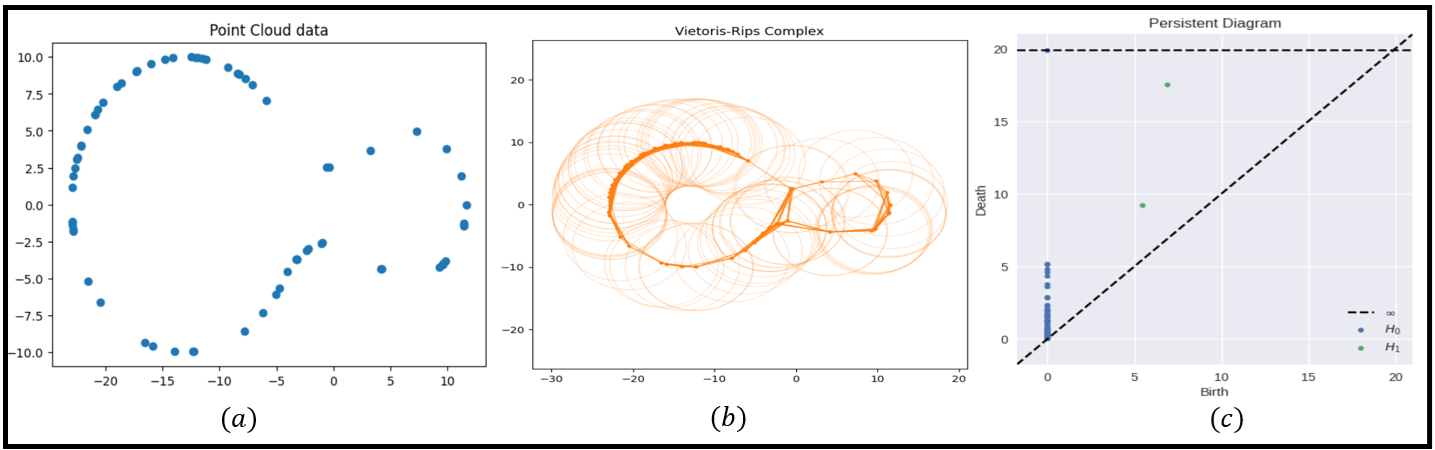